In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def pagerank(adj_matrix, alpha=0.85, max_iter=100, tol=1.0e-6):
    n = adj_matrix.shape[0]
    M = adj_matrix / adj_matrix.sum(axis=0)
    M = np.nan_to_num(M)  # Handle division by zero
    v = np.ones(n) / n  # Initialize PageRank vector
    for _ in range(max_iter):
        v_new = alpha * np.dot(M, v) + (1 - alpha) / n
        if np.linalg.norm(v_new - v) < tol:
            break
        v = v_new
    return v

In [3]:
def display_pagerank(graph, pr_values):
    plt.figure(figsize=(7, 7))  # Square figure for better circular layout
    
    # Use circular layout for cyclic graph
    pos = nx.circular_layout(graph)
    
    # Draw the graph with just node numbers
    nx.draw(graph, pos, 
           with_labels=True,
           node_size=2000,
           node_color="skyblue",
           font_size=20,
           font_weight="bold",
           arrows=True,
           arrowsize=20,
           edge_color='black',
           width=2)
    
    # Add PageRank values below nodes
    pos_attrs = {}
    for node, coords in pos.items():
        pos_attrs[node] = (coords[0], coords[1] - 0.1)  # Slightly larger offset
        
    # Create labels with PR values
    labels = {node: f"{pr_values[node]:.4f}" for node in graph.nodes()}
    
    # Draw PR values
    nx.draw_networkx_labels(graph, pos_attrs, 
                           labels=labels,
                           font_size=16,
                           font_color="black")
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

PageRank for Non-Cyclic Graph (Case 1):
Node 1: 0.1038
Node 2: 0.0927
Node 3: 0.0797
Node 4: 0.0643
Node 5: 0.0463
Node 6: 0.0250


/var/folders/pw/8vlrhl0n5lvbx2ff4xk6x_mm0000gn/T/ipykernel_35892/1304718333.py:3: RuntimeWarning: invalid value encountered in divide
  M = adj_matrix / adj_matrix.sum(axis=0)
/var/folders/pw/8vlrhl0n5lvbx2ff4xk6x_mm0000gn/T/ipykernel_35892/2619636960.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

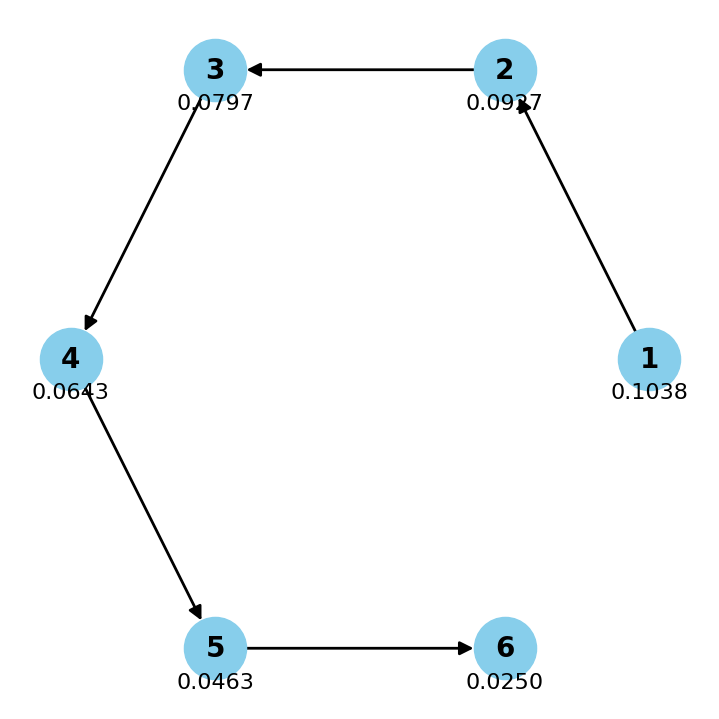

In [4]:
# Case 1: Non-cyclic graph
G1 = nx.DiGraph()
edges1 = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]  # Reversed the edge direction to match the image
G1.add_edges_from(edges1)

# Ensure consistent node ordering
node_list = sorted(G1.nodes())
adj_matrix1 = nx.to_numpy_array(G1, nodelist=node_list)

# Compute PageRank
pr_values1 = pagerank(adj_matrix1)
pr_dict1 = dict(zip(node_list, pr_values1))

# Display results
print("PageRank for Non-Cyclic Graph (Case 1):")
for node, value in sorted(pr_dict1.items(), key=lambda x: x[1], reverse=True):
    print(f"Node {node}: {value:.4f}")

# Adjust display parameters for better visualization
plt.figure(figsize=(12, 8))
display_pagerank(G1, pr_dict1)


PageRank for Cyclic Graph (Case 2):
Node 1: 0.2000
Node 2: 0.2000
Node 3: 0.2000
Node 4: 0.2000
Node 5: 0.2000


/var/folders/pw/8vlrhl0n5lvbx2ff4xk6x_mm0000gn/T/ipykernel_35892/2619636960.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


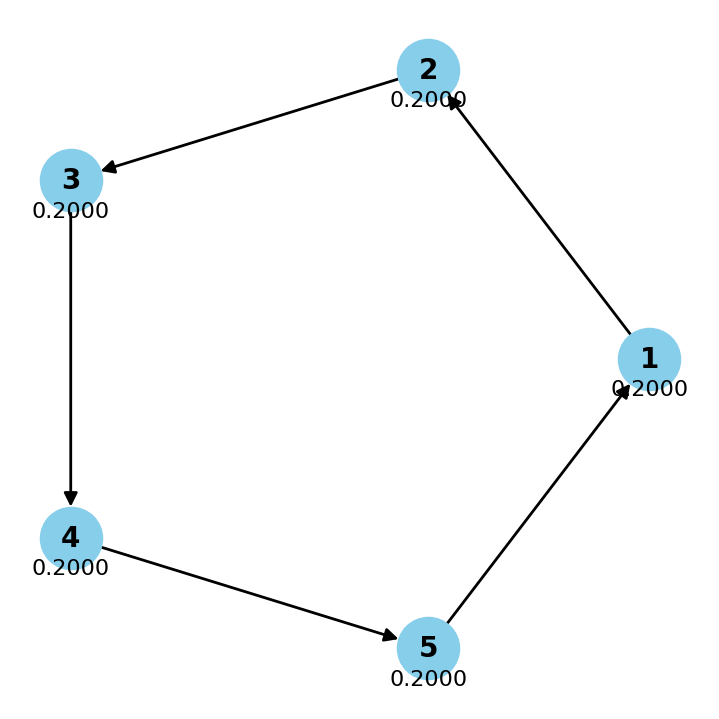

In [5]:
# Case 2: Cyclic graph
G2 = nx.DiGraph()
edges2 = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)]  # Cyclic graph edges
G2.add_edges_from(edges2)

# Ensure consistent node ordering
node_list = sorted(G2.nodes())
adj_matrix2 = nx.to_numpy_array(G2, nodelist=node_list)

# Compute PageRank
pr_values2 = pagerank(adj_matrix2)
pr_dict2 = dict(zip(node_list, pr_values2))

# Print PageRank values in descending order
print("\nPageRank for Cyclic Graph (Case 2):")
for node, value in sorted(pr_dict2.items(), key=lambda x: x[1], reverse=True):
    print(f"Node {node}: {value:.4f}")

# Display the graph
display_pagerank(G2, pr_dict2)